Ideen:
- shot map mit xg
- shot map mit post shot xg
- "Wohin wurde geschossen?" (shot.goalZone)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import fig_text
import numpy as np

#import statsbomb as sb
from matplotlib.patches import Ellipse
from mplsoccer.pitch import Pitch, VerticalPitch

# Import libraries that we use
from pathlib import Path
import json
from tqdm import tqdm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os

%matplotlib inline
from highlight_text import ax_text
from mplsoccer import VerticalPitch, FontManager, Sbopen, add_image
from adjustText import adjust_text
from PIL import Image

event_df = pd.read_csv('data/wyscout_events.csv')
shots= event_df[(event_df['type.primary'] == 'shot')]   #All shots
headers= shots[(shots['shot.bodyPart']== 'head_or_other')] # Headers
shots_on_target=shots[(shots['shot.onTarget']==True)] #Shots on target





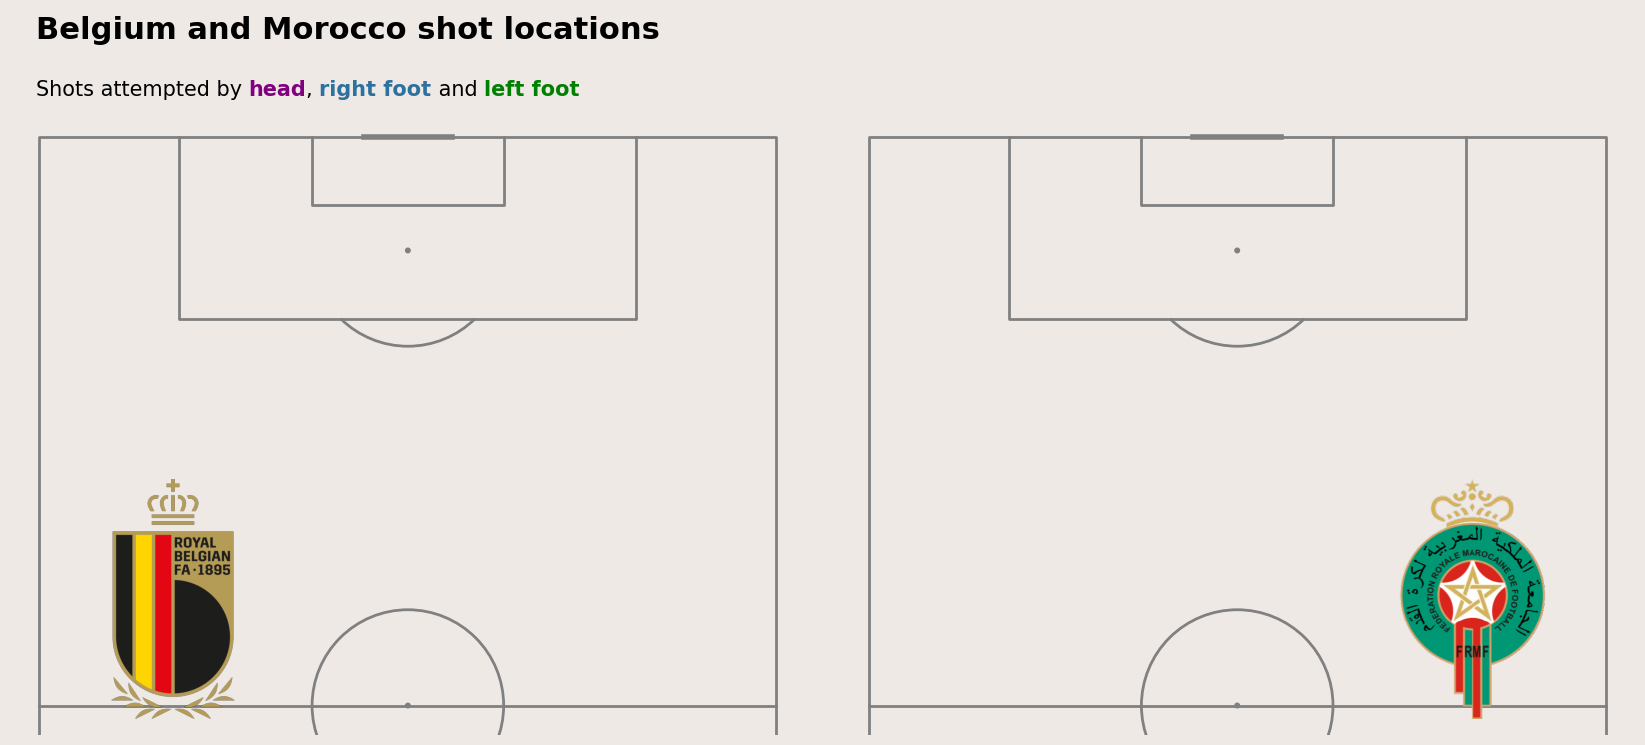

In [11]:

# def transform_coords(coords):       #NICHT GANZ SICHER OB DAS STIMMT FÜR WYSCOUT
#     y = coords[0] * 100
#     x = (1 - coords[1]) * 100
#     return x, y

def transform_coords(coords):
    y=coords[0]
    x= 1-coords[1]
    return x, y

team1_name = 'Belgium'
team2_name = 'Morocco'

team_1_ID = 5629
#team_2_ID = 'TBD'

#set colors for the graph
headercolor = 'purple'
rightfootcolor = '#2D719F'
leftfootcolor = 'green'
othercolor = 'yellow'

# draw pitch
pitch = VerticalPitch(pad_top=10, pitch_color='#EFE9E6', line_color='grey', pitch_type='wyscout', half=True, line_zorder=2)             #VerticalPitch
fig, ax = pitch.grid(figheight=8, ncols=2, endnote_height=0, endnote_space=0, axis = False, title_height=0, grid_height=0.84)

#set background color of the plot
fig.patch.set_facecolor('#EFE9E6')

#import logos
NED_logo = Image.open('wappen/belgien.png')
SEN_logo = Image.open('wappen/morocco.png')
#add and place logos
logo1_ax = fig.add_axes([-.03, 0.1, 0.3, 0.3], zorder=1)
logo1_ax.imshow(NED_logo)
logo1_ax.axis("off")

logo2_ax = fig.add_axes([0.73, 0.1, 0.3, 0.3], zorder=1)
logo2_ax.imshow(SEN_logo)
logo2_ax.axis("off")
#uncomment up to here if you do not wish to include logos in your graph
#-------------------------------------------------------------------------------------------------------------------------------
marksize= 100


for _, shot in shots.iterrows():
    # transform coordinates
    shot_x, shot_y = transform_coords([shot['location.x'], shot['location.y']]) 
    # shot_x = shot['location.y']
    # shot_y = shot['location.x']


    #set default case variables
    shot_type = shot['shot.bodyPart']
    markersize = marksize * shot['shot.xg']
    marker = 'o'
    #change the color of the marker depending on what type of shot it was
    if (shot_type == 'head_or_other'):
        marker_color = headercolor
    elif (shot_type == 'right_foot'):
        marker_color = rightfootcolor
    elif (shot_type == 'left_foot'):
        marker_color = leftfootcolor
    else:
        marker_color = othercolor

    #change the type of marker according to the outcome of the shot
    if ((shot['shot.onTarget']==True)):
        marker = 'D'

    if (shot['shot.isGoal'] == True):
        marker = '*'
        markersize = marksize * shot['shot.xg']
    
#-------------------------------------------------------------------------------------------------------------------------


    #what graph the shot will be plotted on i.e. which team made the shot
    plot_t = 0 if shot['team.id'] == team_1_ID else 1

    #as we are only looking at half pitches, the x and y coordinates need to be mirrored so they appear on the graph
    if (shot['location.x'] > 50):
        ax[plot_t].plot(shot_x, shot_y, color = marker_color, marker = marker, markersize = markersize, label = shot_type)
    else:
        shot_x, shot_y = transform_coords([1 - shot['location.x'], 1 -shot['location.y']])
        # shot_x=1-shot['location.y']
        # shot_y=1-shot['location.x']
        # shot_x = 1- shot_x
        # shot_y = 1 - shot_y

        
        ax[plot_t].plot(shot_x, shot_y, color = marker_color, marker = marker, markersize = markersize, label = shot_type)

#draw the title
fig_text(x = 0.04, y = 0.98,
    s =f'{team1_name} and {team2_name} shot locations',
    color = "black",
    weight = "bold",
    size = 22,
    annotationbbox_kw={"xycoords": "figure fraction"})

#draw the subtext
fig_text(
    x = 0.04, y = 0.9,
    s = "Shots attempted by <head>, <right foot> and <left foot>",
    highlight_textprops = [
        {"color": headercolor, "weight": "bold"},
        {"color": rightfootcolor, "weight": "bold"}, 
        {"color": leftfootcolor, "weight": "bold"}
    ],
    color = "black",
    size = 15,
    annotationbbox_kw={"xycoords": "figure fraction"}
)
plt.savefig('wyscout_shotmap.png')
plt.show()


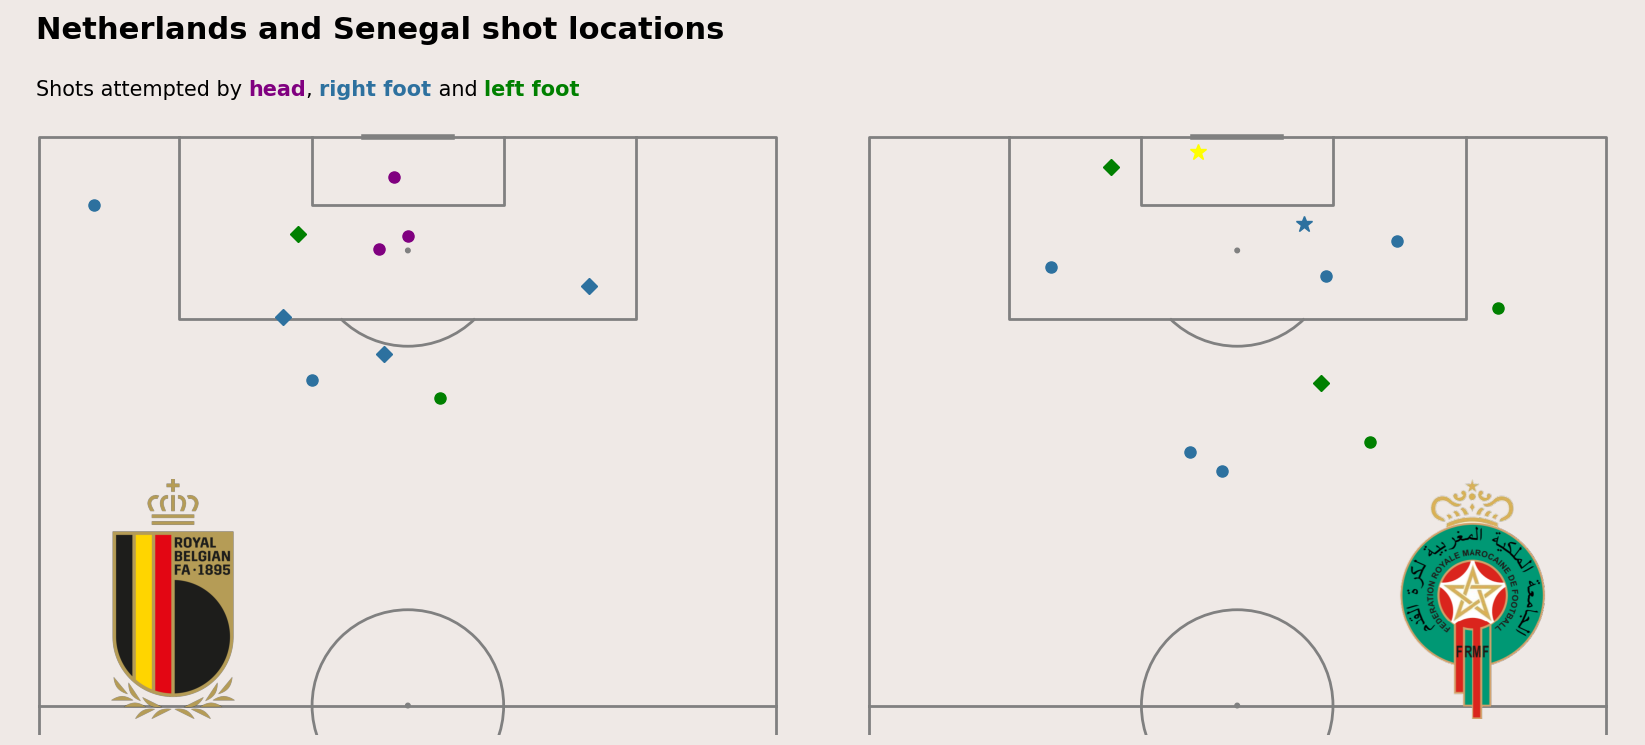

In [4]:
#FIFA
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from PIL import Image
from highlight_text import fig_text

event_df = pd.read_csv('data/events.csv')
shots = event_df[(event_df['event'] == 'attempt_at_goal')] #filter by all shots
headers = shots[(shots['body_type'] == 'head')] #only headers
shots_on_target = shots[((shots['outcome'] == 'on_target') | (shots['outcome'] == 'saved'))] #only shots on target

def transform_coords(coords):
    y = coords[0] * 100
    x = (1 - coords[1]) * 100
    return x, y


team1_name = 'Netherlands'
team2_name = 'Senegal'

team_1_ID = 43935
#team_2_ID = 'TBD'

#set colors for the graph
headercolor = 'purple'
rightfootcolor = '#2D719F'
leftfootcolor = 'green'
othercolor = 'yellow'

# draw pitch
pitch = VerticalPitch(pad_top=10, pitch_color='#EFE9E6', line_color='grey', pitch_type='wyscout', half=True, line_zorder=2)
fig, ax = pitch.grid(figheight=8, ncols=2, endnote_height=0, endnote_space=0, axis = False, title_height=0, grid_height=0.84)

#set background color of the plot
fig.patch.set_facecolor('#EFE9E6')

#import logos
NED_logo = Image.open('wappen/belgien.png')
SEN_logo = Image.open('wappen/morocco.png')
#add and place logos
logo1_ax = fig.add_axes([-.03, 0.1, 0.3, 0.3], zorder=1)
logo1_ax.imshow(NED_logo)
logo1_ax.axis("off")

logo2_ax = fig.add_axes([0.73, 0.1, 0.3, 0.3], zorder=1)
logo2_ax.imshow(SEN_logo)
logo2_ax.axis("off")
#uncomment up to here if you do not wish to include logos in your graph

punktgroesse=10


for _, shot in shots.iterrows():
    # transform coordinates
    shot_x, shot_y = transform_coords([shot['x_location_start'], shot['y_location_start']])
    #set default case variables
    shot_type = shot['body_type']
    marker = 'o'
    markersize = 8

    #change the color of the marker depending on what type of shot it was
    if (shot_type == 'head'):
        marker_color = headercolor
    elif (shot_type == 'right_foot'):
        marker_color = rightfootcolor
    elif (shot_type == 'left_foot'):
        marker_color = leftfootcolor
    else:
        marker_color = othercolor

    #change the type of marker according to the outcome of the shot
    if ((shot['outcome'] == 'on_target') | (shot['outcome'] == 'saved')):
        marker = 'D'

    if (shot['outcome_additional'] == 'goal'):
        marker = '*'
        markersize = 12
    
    #what graph the shot will be plotted on i.e. which team made the shot
    plot_t = 0 if shot['team_id'] == team_1_ID else 1

    #as we are only looking at half pitches, the x and y coordinates need to be mirrored so they appear on the graph
    if (shot['x_location_start'] > 0.5):
        ax[plot_t].plot(shot_x, shot_y, color = marker_color, marker = marker, markersize = markersize, label = shot_type)
    else:
        shot_x, shot_y = transform_coords([1 - shot['x_location_start'], 1 -shot['y_location_start']])
        ax[plot_t].plot(shot_x, shot_y, color = marker_color, marker = marker, markersize = markersize, label = shot_type)

#draw the title
fig_text(x = 0.04, y = 0.98,
    s =f'{team1_name} and {team2_name} shot locations',
    color = "black",
    weight = "bold",
    size = 22,
    annotationbbox_kw={"xycoords": "figure fraction"})

#draw the subtext
fig_text(
    x = 0.04, y = 0.9,
    s = "Shots attempted by <head>, <right foot> and <left foot>",
    highlight_textprops = [
        {"color": headercolor, "weight": "bold"},
        {"color": rightfootcolor, "weight": "bold"}, 
        {"color": leftfootcolor, "weight": "bold"}
    ],
    color = "black",
    size = 15,
    annotationbbox_kw={"xycoords": "figure fraction"}
)
plt.savefig('FIFA_shotmap.png')
plt.show()


In [5]:
#STATSBOMB


#BEL : MOR = 3857283
robotto_regular = FontManager()
parser = Sbopen()
#Change here your match ID in Statsbomb and the team names 
df_event, df_related, df_freeze, df_tactics = parser.event(3857283)
team1="Belgium"
team2='Morocco'
# lineup data
df_shot_sb=df_event[df_event['type_name']=='Shot']
df_shot_onTarget= df_shot_sb[(df_shot_sb['outcome_name']==('Saved' or 'Saved To Post'))]
df_goals= df_shot_sb[(df_shot_sb['outcome_name']== 'Goal')]


print(df_goals)

# df_goal_team1=df_shot_sb[(df_shot_sb['outcome_name']=='Goal') & (df_shot_sb['team_name']==team1)]
# df_goal_team2=df_shot_sb[(df_shot_sb['outcome_name']=='Goal') & (df_shot_sb['team_name']==team2)]


                                        id  index  period        timestamp  \
2932  24ff4125-033c-46d4-aa49-789349881943   2933       2  00:27:37.205000   
3564  fd96509c-06be-4f53-b0d1-a3afd34aa9dd   3565       2  00:46:51.281000   

      minute  second  possession  duration  match_id  type_id  ...  \
2932      72      37         128  0.196009   3857283       16  ...   
3564      91      51         156  0.499931   3857283       16  ...   

     substitution_replacement_name  pass_deflected block_offensive  \
2932                           NaN             NaN             NaN   
3564                           NaN             NaN             NaN   

      pass_goal_assist shot_one_on_one  shot_open_goal pass_no_touch  \
2932               NaN            True            True           NaN   
3564               NaN             NaN             NaN           NaN   

      foul_committed_advantage  foul_won_advantage pass_cut_back  
2932                       NaN                 NaN         

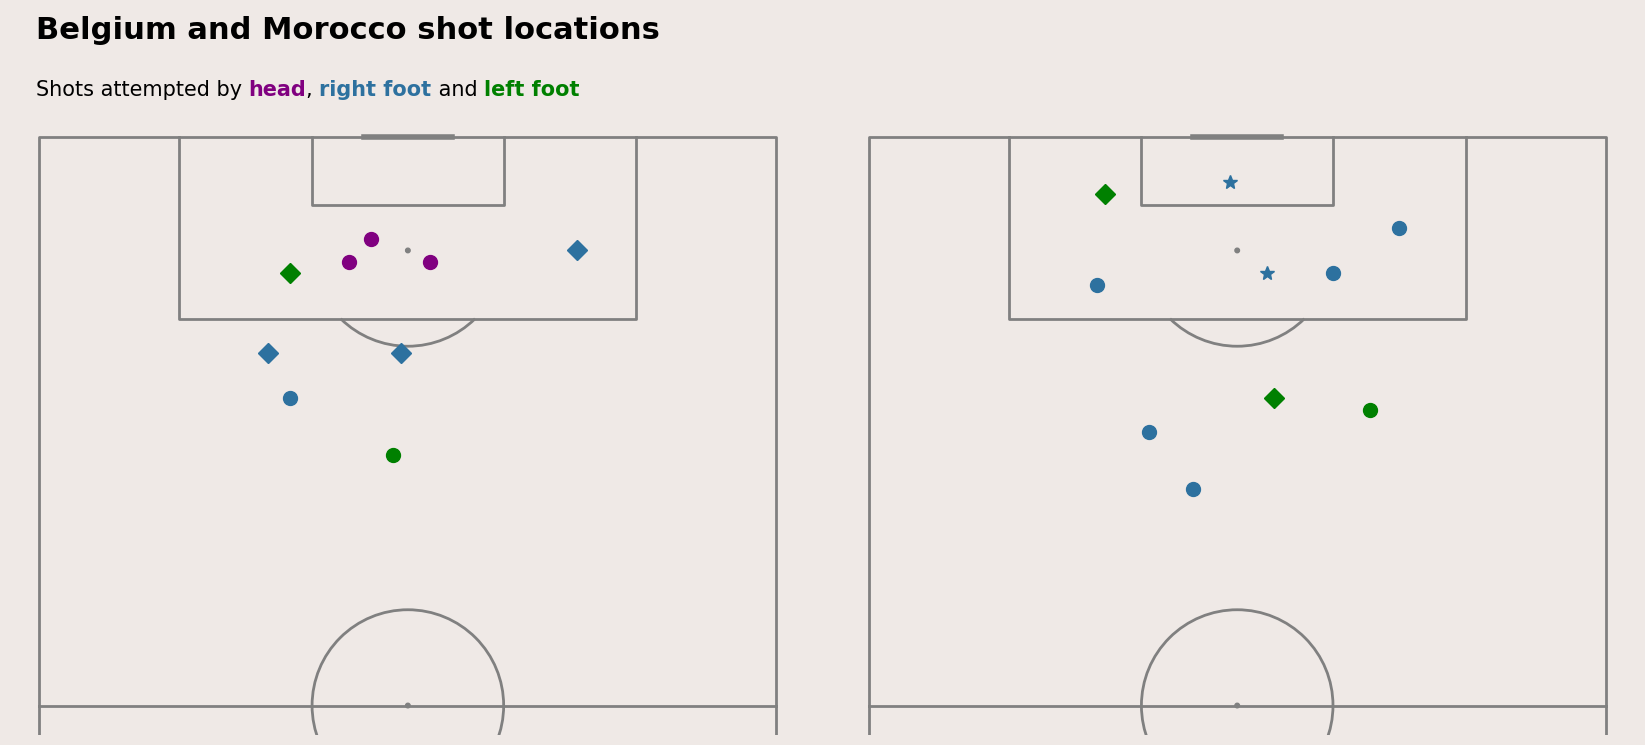

TypeError: string indices must be integers

In [14]:

event_df = pd.read_csv('data/wyscout_events.csv')
shots= event_df[(event_df['type.primary'] == 'shot')]   #All shots
headers= shots[(shots['shot.bodyPart']== 'head_or_other')] # Headers
shots_on_target=shots[(shots['shot.onTarget']==True)] #Shots on target


# def transform_coords(coords):       #NICHT GANZ SICHER OB DAS STIMMT FÜR WYSCOUT
#     y = coords[0] * 100
#     x = (1 - coords[1]) * 100
#     return x, y

def transform_coords(coords):
    y=coords[0]
    x= coords[1]
    return x, y

team1_name = 'Belgium'
team2_name = 'Morocco'

team_1_ID = 5629
#team_2_ID = 'TBD'

#set colors for the graph
headercolor = 'purple'
rightfootcolor = '#2D719F'
leftfootcolor = 'green'
othercolor = 'yellow'

# draw pitch
pitch = VerticalPitch(pad_top=10, pitch_color='#EFE9E6', line_color='grey', pitch_type='wyscout', half=True, line_zorder=2)             #VerticalPitch
fig, ax = pitch.grid(figheight=8, ncols=2, endnote_height=0, endnote_space=0, axis = False, title_height=0, grid_height=0.84)

#set background color of the plot
fig.patch.set_facecolor('#EFE9E6')

# #import logos
# NED_logo = Image.open('wappen/belgien.png')
# SEN_logo = Image.open('wappen/morocco.png')
# #add and place logos
# logo1_ax = fig.add_axes([-.03, 0.1, 0.3, 0.3], zorder=1)
# logo1_ax.imshow(NED_logo)
# logo1_ax.axis("off")

# logo2_ax = fig.add_axes([0.73, 0.1, 0.3, 0.3], zorder=1)
# logo2_ax.imshow(SEN_logo)
# logo2_ax.axis("off")
# #uncomment up to here if you do not wish to include logos in your graph

marksize= 10

for _, shot in shots.iterrows():
    # transform coordinates
    # shot_x, shot_y = transform_coords([shot['location.x'], shot['location.y']]) 
    shot_x = shot['location.y']
    shot_y = shot['location.x']


    #set default case variables
    shot_type = shot['shot.bodyPart']
    marker = 'o'
    markersize = marksize #* shot['shot.xg']

    #change the color of the marker depending on what type of shot it was
    if (shot_type == 'head_or_other'):
        marker_color = headercolor
    elif (shot_type == 'right_foot'):
        marker_color = rightfootcolor
    elif (shot_type == 'left_foot'):
        marker_color = leftfootcolor
    else:
        marker_color = othercolor

    #change the type of marker according to the outcome of the shot
    if ((shot['shot.onTarget']==True)):
        marker = 'D'

    if (shot['shot.isGoal'] == True):
        marker = '*'
        markersize = marksize #* shot['shot.xg']
    
#-------------------------------------------------------------------------------------------------------------------------


    #what graph the shot will be plotted on i.e. which team made the shot
    plot_t = 0 if shot['team.id'] == team_1_ID else 1

    #as we are only looking at half pitches, the x and y coordinates need to be mirrored so they appear on the graph
    if (shot['location.x'] > 50):
        ax[plot_t].plot(shot_x, shot_y, color = marker_color, marker = marker, markersize = markersize, label = shot_type)
    else:
        # shot_x, shot_y = transform_coords([1 - shot['location.x'], 1 -shot['location.y']])
        # shot_x=1-shot['location.y']
        # shot_y=1-shot['location.x']
        shot_x = 1- shot_x
        shot_y = 1 - shot_y
        ax[plot_t].plot(shot_x, shot_y, color = marker_color, marker = marker, markersize = markersize, label = shot_type)

#draw the title
fig_text(x = 0.04, y = 0.98,
    s =f'{team1_name} and {team2_name} shot locations',
    color = "black",
    weight = "bold",
    size = 22,
    annotationbbox_kw={"xycoords": "figure fraction"})

#draw the subtext
fig_text(
    x = 0.04, y = 0.9,
    s = "Shots attempted by <head>, <right foot> and <left foot>",
    highlight_textprops = [
        {"color": headercolor, "weight": "bold"},
        {"color": rightfootcolor, "weight": "bold"}, 
        {"color": leftfootcolor, "weight": "bold"}
    ],
    color = "black",
    size = 15,
    annotationbbox_kw={"xycoords": "figure fraction"}
)
plt.savefig('wyscout_shotmap.png')
plt.show()


